### We will predicted Car Brand using a pretrained Model

Required Libraries

In [ ]:
from tensorflow import keras
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.utils import plot_model
from glob import glob#to wrok with multiple folder and read all the thing in the folder
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, Softmax #we use dropout for controll overffitting
from tensorflow.keras.optimizers import Adam

### Good to know -
to control overfitting we can use
1. Dropout
2. Regularization - (L1, L2)
3. Early Stopping

In [ ]:
# #model architecture

# model = Sequential()

# model.add(Conv2D()) #Feature Processing
# model.add(Maxpooling2D()) #Down Sampling or Sampling
# model.add(BatchNormalization()) #Normalized or scaling, ignore if dataset is normalized or supervised
# model.add(Dropout(0.3)) #Dropout

In [4]:
Image_size = [224, 224]
valid_path = "../input/cardatasets/dataset/Images/Test"
train_path = "../input/cardatasets/dataset/Images/Train"

Here include_top argument set to False. This means that the final fully connected layer of the model, which is used for classification, will not be included in the imported model.

The input_shape argument is set to Image_size + [3], which specifies the size of the input images to the ResNet50 model. The Image_size variable should be a list or tuple of two integers that specify the height and width of the input images. The + [3] is added to indicate that the input images are RGB color images, with 3 color channels.

The weights argument is set to 'imagenet', which means that the pre-trained weights for the ResNet50 model on the ImageNet dataset will be loaded

94765736/94765736 [==============================] - 0s 0us/step


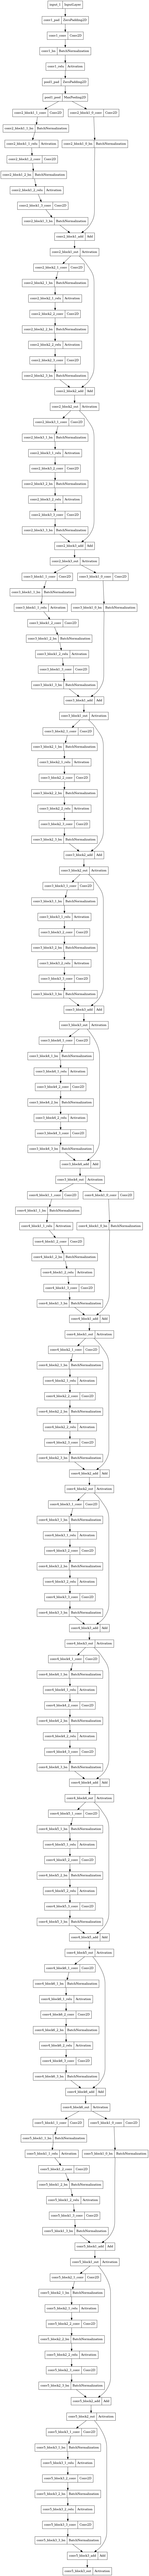

In [6]:
resnet = ResNet50(include_top = False, 
                  input_shape = Image_size + [3],
                 weights = 'imagenet')
plot_model(resnet)

In [8]:
for layer in resnet.layers:
    layer.trainable = False #trainable is false beacuse here we use a pretrained model so we don't need to train

In [9]:
folders = glob("../input/cardatasets/dataset/Images/Train/*")
folders ##read all the information in folder using glob

['../input/cardatasets/dataset/Images/Train/mercedes',
 '../input/cardatasets/dataset/Images/Train/lamborghini',
 '../input/cardatasets/dataset/Images/Train/audi']

Flatten is use to convert one dimesional array.

The Dense layer has a number of nodes equal to len(folders), which is the number of classes in the classification problem. The activation argument is set to 'softmax', which means that the output of the model will be a probability distribution over the different classes.

creates a new Model object that specifies the inputs to the model (resnet.input) and the outputs of the model (prediction). This effectively combines the ResNet50 model with the new layers that were added on top.

compile method to specify the loss function, optimizer, and evaluation metric(s) to use during training. Here, the loss function is set to 'categorical_crossentropy', the optimizer is set to 'adam' as adam is the most useful optimizer, and the metric to evaluate the model performance is set to 'accuracy'.

In [10]:
x = Flatten()(resnet.output)
prediction = Dense(len(folders), activation = 'softmax')(x)
model = Model(inputs = resnet.input, outputs = prediction)
plot_model(model)
model.compile(loss = 'categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

ImageDataGenerator object for the training dataset. The rescale argument is set to 1./255, which means that the pixel values of the input images will be scaled down by a factor of 255 before being fed into the model. 

The other arguments (shear_range, zoom_range, and horizontal_flip) are data augmentation techniques that randomly transform the input images during training to increase the variability of the dataset and prevent overfitting.

At last ImageDataGenerator object for the testing dataset. The rescale argument is set to 1./255, but no data augmentation techniques are applied to the testing data, since we want to evaluate the model's performance on the original, unmodified images.


In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator #used to generate batches of images for training and testing.

train_datagen = ImageDataGenerator(rescale = 1./255,
                                  shear_range = 0.2,
                                  zoom_range = 0.2,
                                  horizontal_flip = True)# image augmentation is happening
test_datagen = ImageDataGenerator(rescale = 1./255)

In [12]:
training_set = train_datagen.flow_from_directory("../input/cardatasets/dataset/Images/Train",target_size=(224,224),batch_size=32,class_mode='categorical')
test_set = train_datagen.flow_from_directory("../input/cardatasets/dataset/Images/Test",target_size=(224,224),batch_size=32,class_mode='categorical')

Found 64 images belonging to 3 classes.
Found 58 images belonging to 3 classes.


Here The epochs argument is set to 50, which means that the model will be trained for 50 passes through the entire training dataset.

The steps_per_epoch argument is set to the length of the training_set generator, which specifies how many batches of images to generate during each epoch of training.

The validation_steps argument is set to the length of the test_set generator, which specifies how many batches of images to generate during each epoch of testing.

The fit method returns a History object, which contains information about the training history of the model (e.g., loss and accuracy metrics). This object is assigned to the variable r for later analysis or visualization.

In [13]:
r = model.fit(
    training_set,
    validation_data=test_set,
    epochs=50,
    steps_per_epoch=len(training_set),
    validation_steps=len(test_set))


Epoch 1/50
2/2 [==============================] - 13s 3s/step - loss: 5.0423 - accuracy: 0.2969 - val_loss: 11.5117 - val_accuracy: 0.3276
Epoch 2/50
2/2 [==============================] - 2s 2s/step - loss: 11.7718 - accuracy: 0.3906 - val_loss: 3.7284 - val_accuracy: 0.5172
Epoch 3/50
2/2 [==============================] - 2s 1s/step - loss: 4.9229 - accuracy: 0.3594 - val_loss: 4.1803 - val_accuracy: 0.1552
Epoch 4/50
2/2 [==============================] - 2s 1s/step - loss: 4.0564 - accuracy: 0.3594 - val_loss: 5.1700 - val_accuracy: 0.1552
Epoch 5/50
2/2 [==============================] - 2s 1s/step - loss: 3.4013 - accuracy: 0.4375 - val_loss: 4.5149 - val_accuracy: 0.3276
Epoch 6/50
2/2 [==============================] - 2s 1s/step - loss: 2.6584 - accuracy: 0.3906 - val_loss: 2.1162 - val_accuracy: 0.5172
Epoch 7/50
2/2 [==============================] - 2s 1s/step - loss: 2.3921 - accuracy: 0.4531 - val_loss: 3.0364 - val_accuracy: 0.5345
Epoch 8/50
2/2 [======================

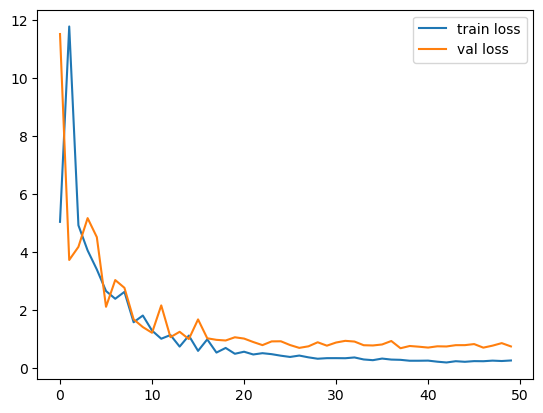

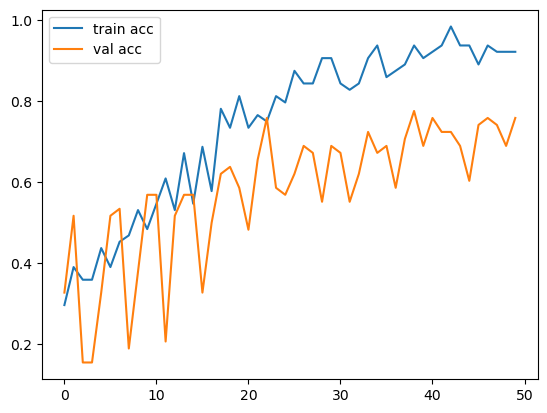

<Figure size 640x480 with 0 Axes>

In [14]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [15]:
import numpy as np
from tensorflow.keras.models import load_model
model.save('../working/model_resnet50.h5')
y_pred = model.predict(test_set)
y_pred = np.argmax(y_pred, axis=1)

2/2 [==============================] - 2s 316ms/step


In [16]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
model=load_model('../working/model_resnet50.h5')

In [17]:
img=image.load_img('../input/cardatasets/dataset/Images/Test/lamborghini/13.jpg',target_size=(224,224))
x=image.img_to_array(img)
x =x /255
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [19]:
preds = model.predict(x)
preds=np.argmax(preds, axis=1)
if preds==1:
    preds="The Car is Audi"
elif preds==2:
    preds="The Car is Lamborghini"
else:
    preds="The Car is Mercedes"

1/1 [==============================] - 0s 26ms/step


In [20]:
print(preds)

The Car is Lamborghini
